<a href="https://colab.research.google.com/github/ZeleOeO/Artificial-Intelligence-Projects/blob/main/Pneumonic_Liver_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images")


Skipping, found downloaded files in "./labeled-chest-xray-images" (use force=True to force download)


In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

#to make it more random
train_transform = transforms.Compose([
                                            transforms.Resize(224),
                                            transforms.CenterCrop(224),
                                            transforms.ColorJitter(brightness = 0.10, contrast=0.1,
                                                                  saturation=0.10, hue =0.1),
                                            transforms.RandomHorizontalFlip(),
                                            transforms.RandomRotation(10),
                                            transforms.ToTensor(),
                                            transforms.Normalize(mean = [0.485, 0.456, 0.406],
                                                                  std = [0.229, 0.224, 0.225])])

In [ ]:
train_dataset = datasets.ImageFolder(root="/content/labeled-chest-xray-images/chest_xray/train", transform = transform)
test_dataset = datasets.ImageFolder(root="/content/labeled-chest-xray-images/chest_xray/test", transform = train_transform)
class_names = train_dataset.classes

len(train_dataset), len(test_dataset), class_names

(5232, 624, ['NORMAL', 'PNEUMONIA'])

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle = True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle=True)

In [ ]:
import matplotlib.pyplot as plt

def imshow(image):
  image = image.numpy()
  image = image.transpose((1, 2, 0))
  plt.imshow(image)
  plt.axis("off")
  plt.show()

In [ ]:
images, labels = next(iter(test_dataloader))

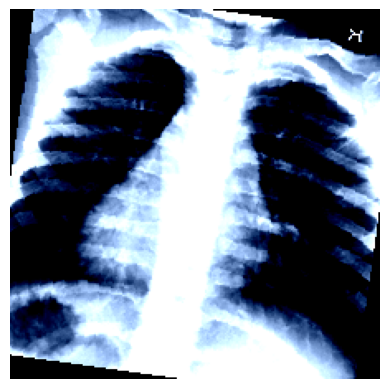

In [ ]:
imshow(images[3])

In [ ]:
print(labels)

tensor([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1])


In [ ]:
class NetModel(nn.Module):
  def __init__(self):
    super(NetModel, self).__init__()

    self.convblock1 = nn.Sequential(
        nn.Conv2d(3, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32)
    )

    self.convblock2 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(64)
    )

    self.convblock3 = nn.Sequential(
        nn.Conv2d(64, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32)
    )

    self.convblock4 = nn.Sequential(
        nn.Conv2d(32, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16)
    )

    self.convblock5 = nn.Sequential(
        nn.Conv2d(16, 10, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(10)
    )

    self.convblock6 = nn.Sequential(
        nn.Conv2d(10, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(32)
    )

    self.convblock7 = nn.Sequential(
        nn.Conv2d(32, 10, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(10)
    )

    self.convblock8 = nn.Sequential(
        nn.Conv2d(10, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16)
    )

    self.convblock9 = nn.Sequential(
        nn.Conv2d(16, 14, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(14)
    )

    self.convblock10 = nn.Sequential(
        nn.Conv2d(14, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.BatchNorm2d(16)
    )

    self.maxpool = nn.MaxPool2d(2, 2)
    self.avgpool = nn.AvgPool2d(kernel_size=4)
    self.convblockout = nn.Sequential(
        nn.Conv2d(16, 2, kernel_size=1, padding=0)
    )

  def forward(self, x):
    x = self.convblock1(x)
    x = self.maxpool(x)
    x = self.convblock2(x)
    x = self.maxpool(x)
    x = self.convblock3(x)
    x = self.maxpool(x)
    x = self.convblock4(x)
    x = self.convblock5(x)
    x = self.convblock6(x)
    x = self.convblock7(x)
    x = self.convblock8(x)
    x = self.convblock9(x)
    x = self.convblock10(x)
    x = self.avgpool(x)
    x = self.convblockout(x)
    x = self.avgpool(x)
    x = x.view(-1, 2)
    x = F.log_softmax(x, dim=-1)
    return x

In [ ]:
from torchsummary import summary

device="cuda" if torch.cuda.is_available() else "cpu"
print(f"Available processor: {device}")
model = NetModel().to(device)
summary(model, input_size=(3, 224, 224))

Available processor: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
              ReLU-2         [-1, 32, 224, 224]               0
       BatchNorm2d-3         [-1, 32, 224, 224]              64
         MaxPool2d-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]          18,496
              ReLU-6         [-1, 64, 112, 112]               0
       BatchNorm2d-7         [-1, 64, 112, 112]             128
         MaxPool2d-8           [-1, 64, 56, 56]               0
            Conv2d-9           [-1, 32, 56, 56]          18,464
             ReLU-10           [-1, 32, 56, 56]               0
      BatchNorm2d-11           [-1, 32, 56, 56]              64
        MaxPool2d-12           [-1, 32, 28, 28]               0
           Conv2d-13           [-1, 16, 28, 28]           4,624
             

In [ ]:
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

In [ ]:
def accuracy_fn(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels.argmax(dim=1)).sum().item()
    accuracy = correct / labels.size(0)
    return accuracy


In [ ]:
train_losses = []
test_losses = []
train_accuracy = []
test_accuracy = []

def train(model, train_dataloader, optimizer, loss_fn, accuracy_fn, device):
    model.train()  # Set the model in training mode
    train_loss = 0.0
    train_acc = 0.0

    for i, (images, labels) in enumerate(train_dataloader):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        pred_vals = model(images)
        labels = F.one_hot(labels, num_classes=2).float()
        loss = loss_fn(pred_vals, labels)

        train_losses.append(loss)

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += accuracy_fn(pred_vals, labels)

        train_accuracy.append(train_acc)

    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)

    return train_loss, train_acc


def test(model, val_dataloader, loss_fn, accuracy_fn, device):
    model.eval()  # Set the model in evaluation mode
    val_loss = 0.0
    val_acc = 0.0

    with torch.no_grad():
        for images, labels in val_dataloader:
            images = images.to(device)
            labels = labels.to(device)

            pred_vals = model(images)
            labels = F.one_hot(labels, num_classes=2).float()
            loss = loss_fn(pred_vals, labels)

            test_losses.append(loss)

            val_loss += loss.item()
            val_acc += accuracy_fn(pred_vals, labels)

            test_accuracy.append(val_acc)

    val_loss /= len(val_dataloader)
    val_acc /= len(val_dataloader)

    return val_loss, val_acc


In [ ]:
num_epochs = 7

train_loss = 0
train_acc = 0

for epoch in range(num_epochs):

    train_loss, train_acc = train(model, train_dataloader, optimizer, loss_fn, accuracy_fn, device)
    test_loss, test_acc = test(model, test_dataloader,loss_fn, accuracy_fn, device)

    print(f"{epoch+1}/{num_epochs} \t | \t Train Accuracy: {train_acc}  \t | \t  Train Loss: {train_loss} \t | \t Test Accuracy: {test_acc} \t | \t Test Loss: {test_loss}")



1/7 	 | 	 Train Accuracy: 0.9167301829268293  	 | 	  Train Loss: 0.4703552114163957 	 | 	 Test Accuracy: 0.796875 	 | 	 Test Loss: 0.632018992304802
2/7 	 | 	 Train Accuracy: 0.9517911585365854  	 | 	  Train Loss: 0.419749618666928 	 | 	 Test Accuracy: 0.83125 	 | 	 Test Loss: 0.5836225613951683
3/7 	 | 	 Train Accuracy: 0.954077743902439  	 | 	  Train Loss: 0.4112626950188381 	 | 	 Test Accuracy: 0.84375 	 | 	 Test Loss: 0.5782451391220093
4/7 	 | 	 Train Accuracy: 0.9628429878048781  	 | 	  Train Loss: 0.3968180750564831 	 | 	 Test Accuracy: 0.865625 	 | 	 Test Loss: 0.5338419362902641
5/7 	 | 	 Train Accuracy: 0.9672256097560976  	 | 	  Train Loss: 0.39428496869598945 	 | 	 Test Accuracy: 0.7171875 	 | 	 Test Loss: 1.0666471004486084
6/7 	 | 	 Train Accuracy: 0.9649390243902439  	 | 	  Train Loss: 0.394060554482588 	 | 	 Test Accuracy: 0.8234375 	 | 	 Test Loss: 0.6280804321169853
7/7 	 | 	 Train Accuracy: 0.9664634146341463  	 | 	  Train Loss: 0.39455121428501316 	 | 	 Test Accurac

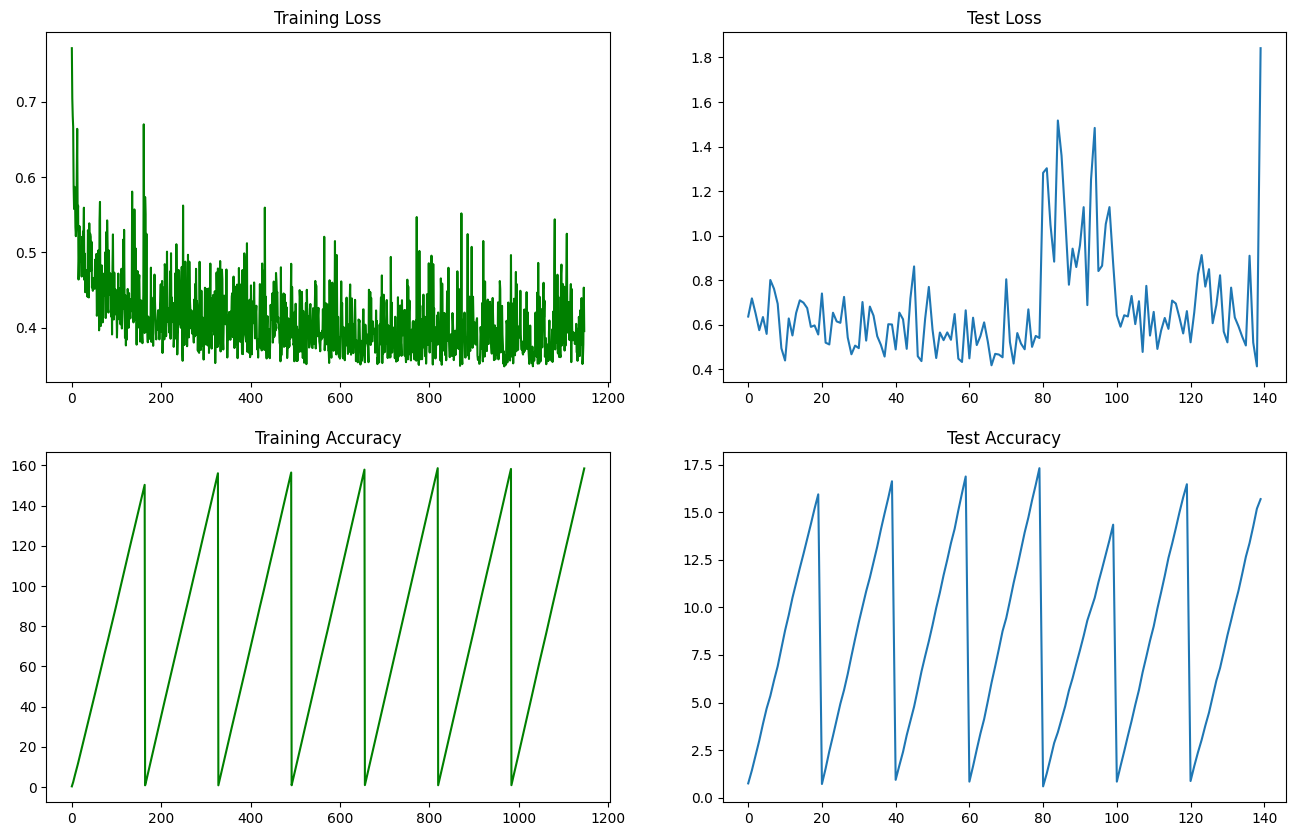

In [ ]:
train_losses1 = [float(i.cpu().detach().numpy()) for i in train_losses]
train_acc1 = [i for i in train_accuracy]
test_losses1 = [float(i.cpu().detach().numpy()) for i in test_losses]
test_acc1 = [i for i in test_accuracy]
fig, axs = plt.subplots(2,2,figsize=(16,10))
axs[0, 0].plot(train_losses1,color='green')
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc1,color='green')
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc1)
axs[1, 1].set_title("Test Accuracy")
plt.show()

In [ ]:
images, labels = next(iter(test_dataloader))

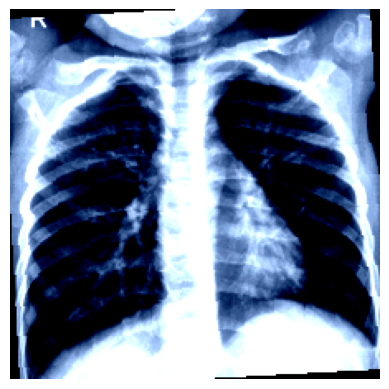

In [ ]:
imshow(images[6])

In [ ]:
def predict(image):
  image = image.unsqueeze(0).to(device)
  predicted_class = torch.argmax(model(image))
  return predicted_class

In [ ]:
image = images[9]
predict(image), labels

(tensor(1, device='cuda:0'),
 tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
         0, 1, 1, 1, 1, 1, 1, 0]))